<a href="https://colab.research.google.com/github/hanucherukuri/Big_Mart_Sales_Prediction/blob/main/Big_Mart_Sales_Prediction_TpotModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Aquisition

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
train_data_path="/content/drive/MyDrive/Big Mart Sales Prediction/train_v9rqX0R.csv"
test_data_path="/content/drive/MyDrive/Big Mart Sales Prediction/test_AbJTz2l.csv"

In [ ]:
train_data=pd.read_csv(train_data_path)
test_data=pd.read_csv(test_data_path)

In [ ]:
train_data.shape, test_data.shape

((8523, 12), (5681, 11))

In [ ]:
train_data["from"]="train_data"
test_data["from"]="test_data"
df=pd.concat([train_data, test_data], ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [ ]:
df.shape

(14204, 13)

# Data Wrangling

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
from                            0
dtype: int64

In [ ]:
df.Item_Outlet_Sales=df.Item_Outlet_Sales.fillna(df.Item_Outlet_Sales.mean())

In [ ]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [ ]:
df.Outlet_Size=df.Outlet_Size.fillna("Medium")

In [ ]:
df.Outlet_Size.value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [ ]:
df.Item_Weight.mean()

12.792854228644991

In [ ]:
df.Item_Weight=df.Item_Weight.fillna(df.Item_Weight.mean())

In [ ]:
df.Item_Weight.isna().sum()

0

In [ ]:
df.Item_Visibility.mean()

0.06595278007399345

In [ ]:
df.loc[df["Item_Visibility"]==0, "Item_Visibility"]=df.Item_Visibility.mean()

In [ ]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'].replace(["LF", "low fat", "reg"], ["Low Fat", 'Low Fat', 'Regular'], inplace=True)

In [ ]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.Item_Identifier.unique

<bound method Series.unique of 0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 14204, dtype: object>

In [ ]:
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 2
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
from                             2
dtype: int64

In [ ]:
df["Item_Type_Combined"]=df.Item_Identifier.apply(lambda x: x[0:2])

In [ ]:
df["Item_Type_Combined"].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [ ]:
df["Item_Type_Combined"]=df["Item_Type_Combined"].map({"FD":"Food_Drink", "NC":"Non_Consumbale","DR":"Drink"})

In [ ]:
df.Item_Type_Combined.value_counts()

Food_Drink        10201
Non_Consumbale     2686
Drink              1317
Name: Item_Type_Combined, dtype: int64

In [ ]:
df["Outlet_Years"]=2020 - df["Outlet_Establishment_Year"]

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data,Food_Drink,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data,Drink,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data,Food_Drink,21
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train_data,Food_Drink,22
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data,Non_Consumbale,33


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
from                          object
Item_Type_Combined            object
Outlet_Years                   int64
dtype: object

In [ ]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.015313,0.033002,0.000462,0.008569,-0.000462
Item_Visibility,-0.015313,1.000000,-0.008790,-0.088598,-0.104207,0.088598
Item_MRP,0.033002,-0.008790,1.000000,0.000141,0.440979,-0.000141
Outlet_Establishment_Year,0.000462,-0.088598,0.000141,1.000000,-0.038061,-1.000000
Item_Outlet_Sales,0.008569,-0.104207,0.440979,-0.038061,1.000000,0.038061
Outlet_Years,-0.000462,0.088598,-0.000141,-1.000000,0.038061,1.000000


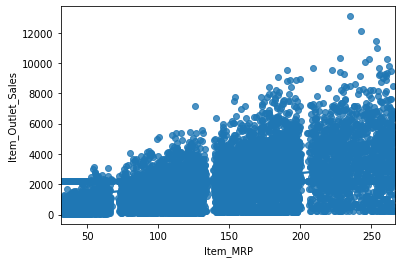

In [ ]:
sns.regplot(x="Item_MRP",y= "Item_Outlet_Sales",data= df)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


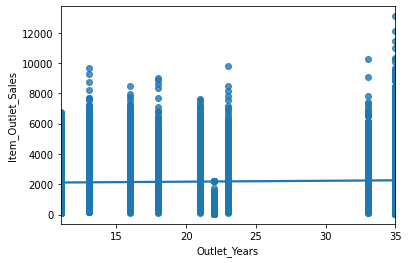

In [ ]:
sns.regplot("Outlet_Years", "Item_Outlet_Sales", df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


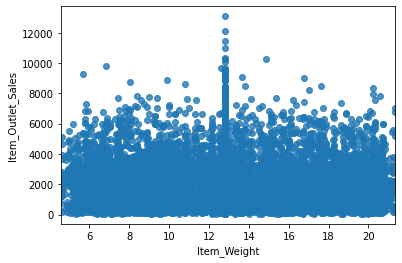

In [ ]:
sns.regplot("Item_Weight", "Item_Outlet_Sales", df)

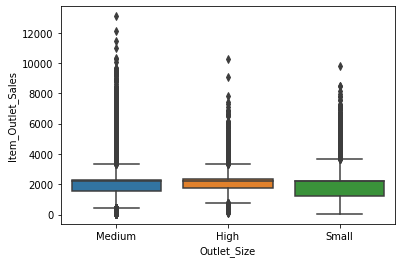

In [ ]:
sns.boxplot(x="Outlet_Size", y="Item_Outlet_Sales",data= df)

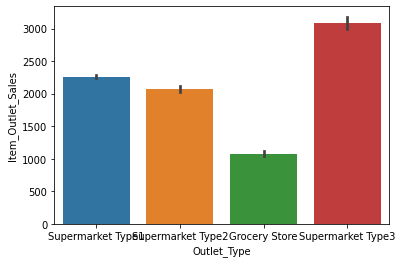

In [ ]:
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales",data= df)

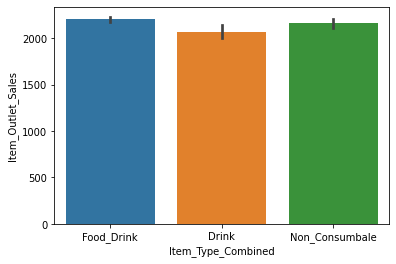

In [ ]:
sns.barplot(x="Item_Type_Combined", y="Item_Outlet_Sales",data= df)

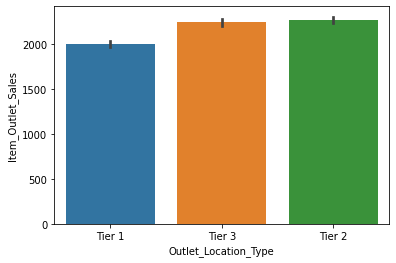

In [ ]:
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df)

In [ ]:
from scipy import stats

In [ ]:
pearson_coef, p_value=stats.pearsonr(df["Item_MRP"], df["Item_Outlet_Sales"])

In [ ]:
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.4409785995519993  with a P-value of P =  0.0


In [ ]:
pearson_coef, p_value=stats.pearsonr(df["Item_Weight"], df["Item_Outlet_Sales"])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.008569012416191506  with a P-value of P =  0.30716520819461063


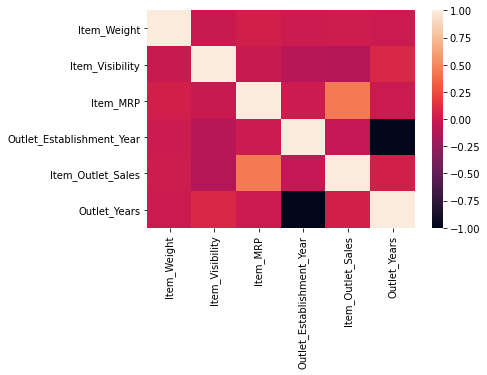

In [ ]:
sns.heatmap(df.corr())

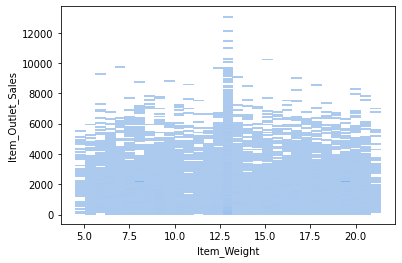

In [ ]:
sns.histplot(x="Item_Weight", y="Item_Outlet_Sales",data=df)

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Le=LabelEncoder()
df["Outlet"]=Le.fit_transform(df["Outlet_Identifier"])

In [ ]:
var_mod = ['Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Item_Fat_Content','Outlet']
for i in var_mod:
  df[i]=Le.fit_transform(df[i]) 

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train_data,1,21,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train_data,0,11,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train_data,1,21,9
3,FDX07,19.20,1,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train_data,1,22,0
4,NCD19,8.93,0,0.065953,Household,53.8614,OUT013,1987,0,2,1,994.7052,train_data,2,33,1


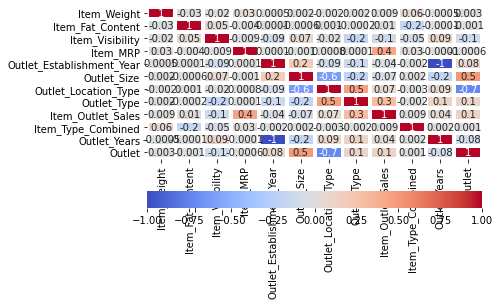

In [ ]:
sns.heatmap(df.corr(), annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=3,cbar_kws= {'orientation': 'horizontal'})

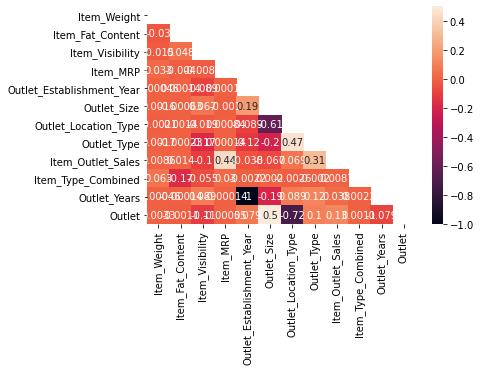

In [ ]:

matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

In [ ]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
Item_Weight,1.000000,-0.030101,-0.015313,0.033002,0.000462,0.001580,-0.002104,0.001699,0.008569,0.062660,-0.000462,0.003274
Item_Fat_Content,-0.030101,1.000000,0.048357,-0.004019,0.000137,-0.000634,0.001373,-0.000228,0.014494,-0.167227,-0.000137,-0.001095
Item_Visibility,-0.015313,0.048357,1.000000,-0.008790,-0.088598,0.067343,-0.019464,-0.173660,-0.104207,-0.054886,0.088598,-0.109090
Item_MRP,0.033002,-0.004019,-0.008790,1.000000,0.000141,-0.001018,0.000838,0.000136,0.440979,0.030219,-0.000141,-0.000555
Outlet_Establishment_Year,0.000462,0.000137,-0.088598,0.000141,1.000000,0.193392,-0.089328,-0.122519,-0.038061,-0.002226,-1.000000,0.079047
Outlet_Size,0.001580,-0.000634,0.067343,-0.001018,0.193392,1.000000,-0.614300,-0.201505,-0.066760,0.002040,-0.193392,0.504580
Outlet_Location_Type,-0.002104,0.001373,-0.019464,0.000838,-0.089328,-0.614300,1.000000,0.467251,0.069224,-0.002572,0.089328,-0.716151
Outlet_Type,0.001699,-0.000228,-0.173660,0.000136,-0.122519,-0.201505,0.467251,1.000000,0.310989,-0.001956,0.122519,0.099899
Item_Outlet_Sales,0.008569,0.014494,-0.104207,0.440979,-0.038061,-0.066760,0.069224,0.310989,1.000000,0.008704,0.038061,0.125742
Item_Type_Combined,0.062660,-0.167227,-0.054886,0.030219,-0.002226,0.002040,-0.002572,-0.001956,0.008704,1.000000,0.002226,0.001090


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train_data,1,21,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train_data,0,11,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train_data,1,21,9
3,FDX07,19.20,1,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train_data,1,22,0
4,NCD19,8.93,0,0.065953,Household,53.8614,OUT013,1987,0,2,1,994.7052,train_data,2,33,1


In [ ]:
training_data=df.loc[df["from"]=="train_data"]
testing_data=df.loc[df["from"]=="test_data"]
print(training_data.shape)
print(testing_data.shape)

(8523, 16)
(5681, 16)


# Drop Un Necessary Data

In [ ]:
training_data.drop(["Item_Identifier","Item_Type","Outlet_Identifier", "Outlet_Establishment_Year", "from"], axis="columns", inplace=True)
training_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,1,21,9
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,0,11,3
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,1,21,9
3,19.20,1,0.065953,182.0950,1,2,0,732.3800,1,22,0
4,8.93,0,0.065953,53.8614,0,2,1,994.7052,2,33,1


In [ ]:
testing_data.drop(["Item_Identifier","Item_Type","Outlet_Identifier", "Outlet_Establishment_Year", "from", "Item_Outlet_Sales"], axis="columns", inplace=True)
testing_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
8523,20.750000,0,0.007565,107.8622,1,0,1,1,21,9
8524,8.300000,1,0.038428,87.3198,1,1,1,1,13,2
8525,14.600000,0,0.099575,241.7538,1,2,0,2,22,0
8526,7.315000,0,0.015388,155.0340,1,1,1,1,13,2
8527,12.792854,1,0.118599,234.2300,1,2,3,1,35,5


In [ ]:

x_data=training_data.drop("Item_Outlet_Sales", axis=1)

y_data=training_data.Item_Outlet_Sales

# Tpot

In [ ]:
# Install tpot on the server
!pip install tpot

     |████████████████████████████████| 92kB 6.2MB/s 
     |████████████████████████████████| 163kB 24.2MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=7216cda9c38d580be29324d04988b9ee3d09e20d3c9e7bf2f23834d269cb1adc
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


# Tpot Regressor

In [ ]:
# Import the tpot regressor
from tpot import TPOTRegressor

In [ ]:
# Create a tpot object with a few parameters
tpot = TPOTRegressor(scoring = 'neg_root_mean_squared_error',
                     generations=5,
                     population_size=50,
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 10)

In [ ]:
# Fit the tpot model on the training data
tpot.fit(x_data, y_data)


Generation 1 - Current best internal CV score: -1079.33146822903

Generation 2 - Current best internal CV score: -1079.33146822903

Generation 3 - Current best internal CV score: -1079.33146822903

Generation 4 - Current best internal CV score: -1078.3841739754962

Generation 5 - Current best internal CV score: -1078.3841739754962

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.8, min_samples_leaf=16, min_samples_split=3, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=10,
              disable_update_check=False, early_stop=None, generations=5,
              log_file=None, max_eval_time_mins=5, max_time_mins=None,
              memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=None, scoring='neg_root_mean_squared_error',
              subsample=1.0, template=None, use_dask=False, verbosity=2,
              warm_start=False)

# ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(bootstrap=True, max_features=0.8, min_samples_leaf=16, min_samples_split=3, n_estimators=100)
reg.fit(x_data, y_data)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features=0.8, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=16,
                    min_samples_split=3, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

# Model Evaluation

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_data, reg.predict(x_data))))

RMSE : 1037


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(reg,x_data, y_data, cv=10, scoring="neg_root_mean_squared_error").mean())

-1078.9725502704646


In [ ]:
y_pred=reg.predict(testing_data)
y_pred

array([1700.09039002, 1425.4504504 ,  592.57939389, ..., 1840.84442177,
       3921.14899933, 1301.61318228])

In [ ]:
submission = pd.DataFrame({'Item_Identifier':test_data['Item_Identifier'],'Outlet_Identifier':test_data['Outlet_Identifier'],'Item_Outlet_Sales': y_pred},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [ ]:
submission.to_csv('submission1.csv',index=False)